# Extract Slices

In this notebook, we will look at how you can use `LUCI` to extract the channels from your datacube corresponding to a certain emission line! This can be useful if you simply want to see what a channel in the cube looks like.

We currently allow a user to extract the following lines:
'Halpha': 656.280,
        'NII6583': 658.341,
        'NII6548': 654.803,
        'SII6716': 671.647,
        'SII6731': 673.085,
        'OII3726': 372.603,
        'OII3729': 372.882,
        'OIII4959': 495.891,
        'OIII5007': 500.684,
        'Hbeta': 486.133,
        'OH': 649.873,
        'HalphaC4': 807.88068,
        'NII6583C4': 810.417771,
        'NII6548C4': 806.062493,
        'OIII5007C2': 616.342,
        'OIII4959C2': 610.441821,
        'HbetaC2': 598.429723,
        'OII3729C1': 459.017742,
        'OII3726C1': 458.674293,
        'FeXIV5303': 530.286,
        'NI5200': 520.026,
        'FeVII5158': 515.89,
        'HeII5411': 541.152

#### * If you have not yet downloaded the sample data cube, uncomment the below cell and run and download the sample data cube.  
This will save a 900MB file called `sample_data.hdf5` to the **`ExampleData`** directory in the **`LUCI`** folder. Do not be concerned if it takes a few minutes to download.

In [1]:
# !wget -O Data/NGC628_SN3.hdf5  https://ws.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/data/pub/CFHT/2307000z.hdf5?RUNID=xc9le6u8llecp7fp

In [1]:
# Imports
import os
import sys
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

# Get location of LUCI 
path = os.path.abspath(os.path.pardir) 
Luci_path = path + '/'
sys.path.insert(0, path)  # add LUCI to the available paths

from LuciBase import Luci
import LUCI.LuciPlotting as lplt

%config Completer.use_jedi=False  # enable autocompletion when typing in Jupyter notebooks

2024-03-08 12:02:27.334822: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-08 12:02:27.336944: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-08 12:02:27.363773: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-08 12:02:27.363868: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-08 12:02:27.364621: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

Set the required parameters. We will be using our machine learning algorithm to get the initial guesses - this happens under the hood in `LuciFit`, so that the user is not required to think about the initial guess

In [2]:
# Initialize paths and set parameters
cube_dir = path + '/Data/ExampleData/'  # Path to data cube
#cube_dir = '/mnt/carterrhea/carterrhea/NGC628'  # Full path to data cube (example 2)
cube_name = 'NGC628_SN3'  # don't add .hdf5 extension
object_name = 'NGC628'
filter_name = 'SN3'
redshift = 0.000133  # Redshift of object
resolution = 1000 # The actual resolution is 400, but we don't have ML algorithms for that resolution, so use 1000

Intialize our LUCI object

In [3]:
cube = Luci(Luci_path, cube_dir + '/' + cube_name, cube_dir, object_name, redshift, resolution)

Reading in data...


100%|█████████████████████████████████████████████| 9/9 [00:01<00:00,  5.02it/s]


To extract the slice, we simply need to call `cube.slicing()` and provide the appropriate lines. Let's just extract H$\alpha$. A special thanks to Louis-Simon Guité for this implementation.

In [5]:
cube.slicing(lines=['Halpha'])

100%|█████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


#######################################################################
Wavelength of the Halpha line in the redshifted frame: 656.37 nm
Wavelength of the last slice: 651.76 nm
Wavelength of the first slice: 661.25 nm



In the cube directory, under the `Luci_outputs` subfolder, we have now created a new folder called `Slice_Halpha` that contains the fits files for each slice and the summed slice. Let's check out the summed slice!

Text(0.5, 1.0, 'Summed Halpha Slice')

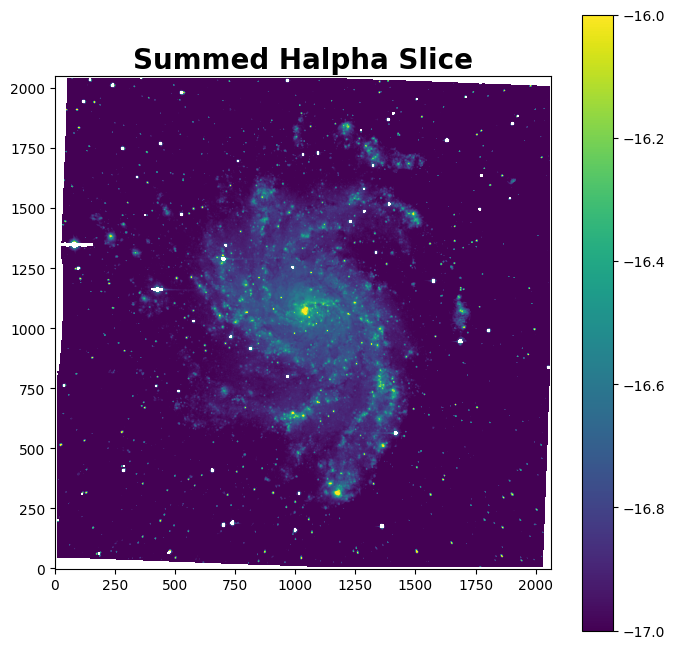

In [17]:
summed_slice_path = os.path.join(cube_dir, 'Luci_outputs/Slice_Halpha/slice_sum.fits')
summed_slice = fits.open(summed_slice_path)
fig = plt.figure(figsize=(8,8))
plt.imshow(np.log10(summed_slice[0].data), origin='lower')
plt.colorbar()
plt.clim(-17, -16)
plt.title('Summed Halpha Slice', fontweight='bold', fontsize=20)
plt.show()